<a href="https://colab.research.google.com/github/enriquemx1/prophet/blob/main/timeseriesdcompose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymannkendall # Install the pymannkendall package

In [ ]:
#load stats libraries pandas numpy and statsmodels
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import (
    adfuller,
    kpss
    )
from statsmodels.graphics.tsaplots import (
    plot_acf,
    plot_pacf
    )
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import pymannkendall as mk

In [ ]:
# importar archivo de excel
df = pd.read_excel('/content/test_data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   bu      322 non-null    object        
 1   date    322 non-null    datetime64[ns]
 2   calls   322 non-null    int64         
 3   aht     322 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 10.2+ KB


In [ ]:
# crear una copia del dataset
df_baking = df.copy()
# hacer drop a todo el contenido de bu excepto porcuando sea igual a CORE_EN
df_baking = df_baking[df_baking['bu'] == 'CORE_EN']
df_baking.info()
df_baking.head()




<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 108 to 134
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   bu      27 non-null     object        
 1   date    27 non-null     datetime64[ns]
 2   calls   27 non-null     int64         
 3   aht     27 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.1+ KB


,bu,date,calls,aht
108,CORE_EN,2023-01-01,313206,297.222137
109,CORE_EN,2023-02-01,276475,307.582951
110,CORE_EN,2023-03-01,313966,317.292079
111,CORE_EN,2023-04-01,273842,318.214969
112,CORE_EN,2023-05-01,279406,320.183594


In [ ]:
# convertir la columna date a fecha y a index
df_baking['date'] = pd.to_datetime(df_baking['date'])
df_baking.set_index('date')
df_baking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 108 to 134
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   bu      27 non-null     object        
 1   date    27 non-null     datetime64[ns]
 2   calls   27 non-null     int64         
 3   aht     27 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.1+ KB


Aplicar Pruebas Estadísticas
Voy a calcular:
- Prueba Dickey-Fuller Aumentada (ADF) → Para verificar si la serie es estacionaria.
- Prueba KPSS → Para confirmar si tiene tendencia.
- Prueba Mann-Kendall → Para detectar tendencias significativas.
- Autocorrelación ACF/PACF → Para evaluar rezagos relevantes.




In [ ]:
# convertir la columna calls en serie tempora
series = df_baking['calls']

In [ ]:
# aplicar prueba dickey-fuller
adf_test = adfuller(series)
print("\nPrueba Dickey-Fuller Aumentada (ADF):")
print(f"Estadístico de prueba: {adf_test[0]}")
print(f"p-valor: {adf_test[1]}")
print(f"Valores críticos: {adf_test[4]}")

if adf_test[1] < 0.05:
    print("✅ La serie es estacionaria.")
else:
    print("❌ La serie tiene tendencia (no es estacionaria).")



Prueba Dickey-Fuller Aumentada (ADF):
Estadístico de prueba: -2.9620466292992624
p-valor: 0.03859401312649732
Valores críticos: {'1%': np.float64(-3.7112123008648155), '5%': np.float64(-2.981246804733728), '10%': np.float64(-2.6300945562130176)}
✅ La serie es estacionaria.


In [ ]:
from statsmodels.tsa.stattools import kpss

# Aplicar prueba KPSS
kpss_test = kpss(series, regression="c")

print("\nPrueba KPSS:")
print(f"Estadístico de prueba: {kpss_test[0]}")
print(f"p-valor: {kpss_test[1]}")
print(f"Valores críticos: {kpss_test[3]}")

if kpss_test[1] < 0.05:
    print("❌ La serie tiene tendencia (no es estacionaria).")
else:
    print("✅ La serie es estacionaria.")


Prueba KPSS:
Estadístico de prueba: 0.17844477841864165
p-valor: 0.1
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
✅ La serie es estacionaria.


<ipython-input-39-7af586a4fff3>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression="c")


In [ ]:
import pymannkendall as mk

# Aplicar prueba Mann-Kendall
mk_result = mk.original_test(series)

print("\nPrueba Mann-Kendall:")
print(f"p-valor: {mk_result.p}")
print(f"Tendencia detectada: {mk_result.trend}")

if mk_result.trend == "no trend":
    print("✅ No hay tendencia significativa.")
elif mk_result.trend == "increasing":
    print("📈 Se detecta una tendencia creciente.")
elif mk_result.trend == "decreasing":
    print("📉 Se detecta una tendencia decreciente.")


Prueba Mann-Kendall:
p-valor: 0.10393710976242976
Tendencia detectada: no trend
✅ No hay tendencia significativa.


<Figure size 1200x600 with 0 Axes>

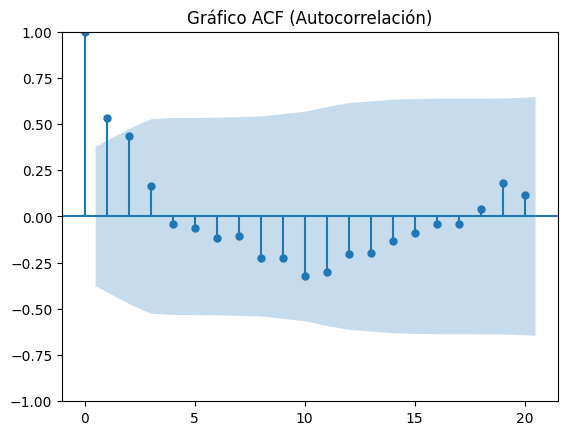

<Figure size 1200x600 with 0 Axes>

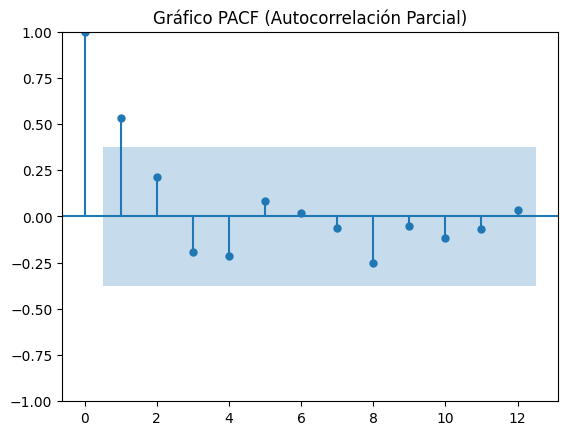

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Gráfico ACF
plt.figure(figsize=(12,6))
plot_acf(series, lags=20)
plt.title("Gráfico ACF (Autocorrelación)")
plt.show()

# Gráfico PACF
plt.figure(figsize=(12,6))
plot_pacf(series, lags=12)
plt.title("Gráfico PACF (Autocorrelación Parcial)")
plt.show()

📌 Interpretación de los resultados
- Si ADF dice que es estacionaria, pero KPSS dice que no, entonces la serie tiene tendencia y necesita diferenciación.
- Si Mann-Kendall detecta tendencia, confirma que la serie tiene un crecimiento o caída sostenida.
- Si ACF/PACF muestran picos en ciertos rezagos, esos rezagos se usan para definir p y q en ARIMA.

✅ Si solo hay tendencia → Se recomienda Holt (suavizamiento doble) o ARIMA con diferenciación.

✅ Si hay tendencia + estacionalidad → Se recomienda Holt-Winters (suavizamiento triple) o SARIMA.


In [ ]:
def ask_stat_tests():
    print("Introduce los resultados de las pruebas estadísticas:")

    # Prueba Dickey-Fuller ADF
    adf_p_value = float(input("📌 Prueba ADF - p-valor (Ejemplo: 0.03): "))
    adf_stationary = adf_p_value < 0.05

    # Prueba KPSS
    kpss_p_value = float(input("📌 Prueba KPSS - p-valor (Ejemplo: 0.07): "))
    kpss_stationary = kpss_p_value > 0.05

    # Test Mann-Kendall
    mk_trend = input("📌 Prueba Mann-Kendall - Tendencia ('no trend', 'increasing' o 'decreasing'): ").lower()

    # ACF/PACF
    acf_cutoff = int(input("📌 Gráfico ACF - ¿En qué rezago se corta la autocorrelación? (Ejemplo: 1, 2, etc.): "))
    pacf_cutoff = int(input("📌 Gráfico PACF - ¿En qué rezago se corta la autocorrelación? (Ejemplo: 1, 2, etc.): "))

    return adf_stationary, kpss_stationary, mk_trend, acf_cutoff, pacf_cutoff


def recommend_model(adf_stationary, kpss_stationary, mk_trend, acf_cutoff, pacf_cutoff):
    print("\n🔍 Análisis de resultados:")

    # Determinar si hay tendencia o estacionalidad
    has_trend = mk_trend in ["increasing", "decreasing"]
    has_seasonality = acf_cutoff >= 2 or pacf_cutoff >= 2

    # Recomendaciones de modelos
    if adf_stationary and kpss_stationary and mk_trend == "no trend":
        print("✅ La serie es estacionaria sin tendencia ni estacionalidad.")
        print("🔹 Recomiendo: **Suavizamiento Exponencial Simple** o **ARMA (ARIMA sin diferenciación)**.")
    elif has_trend and not has_seasonality:
        print("✅ La serie tiene tendencia, pero no estacionalidad.")
        print("🔹 Recomiendo: **Suavizamiento Exponencial Doble (Holt)** o **ARIMA con d=1**.")
    elif has_seasonality and not has_trend:
        print("✅ La serie tiene estacionalidad, pero no tendencia.")
        print("🔹 Recomiendo: **Suavizamiento Exponencial Triple (Holt-Winters)** o **SARIMA**.")
    elif has_trend and has_seasonality:
        print("✅ La serie tiene tendencia y estacionalidad.")
        print("🔹 Recomiendo: **SARIMA** o **Holt-Winters con optimización**.")
    else:
        print("⚠️ No se pudo determinar claramente un patrón. Puedes revisar los datos o probar modelos híbridos.")

# Ejecutar el código
adf_stationary, kpss_stationary, mk_trend, acf_cutoff, pacf_cutoff = ask_stat_tests()
recommend_model(adf_stationary, kpss_stationary, mk_trend, acf_cutoff, pacf_cutoff)

Introduce los resultados de las pruebas estadísticas:
📌 Prueba ADF - p-valor (Ejemplo: 0.03): .038
📌 Prueba KPSS - p-valor (Ejemplo: 0.07): .01
📌 Prueba Mann-Kendall - Tendencia ('no trend', 'increasing' o 'decreasing'): .1
📌 Gráfico ACF - ¿En qué rezago se corta la autocorrelación? (Ejemplo: 1, 2, etc.): 2
📌 Gráfico PACF - ¿En qué rezago se corta la autocorrelación? (Ejemplo: 1, 2, etc.): 2

🔍 Análisis de resultados:
✅ La serie tiene estacionalidad, pero no tendencia.
🔹 Recomiendo: **Suavizamiento Exponencial Triple (Holt-Winters)** o **SARIMA**.


## Modelos de predicción

In [ ]:
# suavizamiento exponencial simple
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Ajustar el modelo de suavizamiento exponencial simple
model = SimpleExpSmoothing(series).fit(smoothing_level=0.2, optimized=False)

# Predicción
forecast = model.forecast(5)
print("Pronóstico:", forecast)


Pronóstico: 27    266228.238286
28    266228.238286
29    266228.238286
30    266228.238286
31    266228.238286
dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Convertir la columna de fecha a formato datetime
df_h = df.copy()
df_h["date"] = pd.to_datetime(df["date"])

# Ordenar por fecha
df_h = df_h.sort_values(by="date")

# Definir la serie temporal
series = df_h["calls"]

# Aplicar Suavizamiento Exponencial Doble (Holt)
model_holt = ExponentialSmoothing(series, trend="add", seasonal=None)
fit_holt = model_holt.fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=True)

# Generar pronósticos
forecast_holt = fit_holt.forecast(10)
print("Pronóstico Holt:", forecast_holt)
# Graficar resultados
plt.figure(figsize=(12,6))
plt.plot(df["date"], series, label="Datos Originales")
plt.plot(df["date"].iloc[-10:], forecast_holt, label="Pronóstico Holt", linestyle="dashed")
plt.legend()
plt.title("Suavizamiento Exponencial Doble (Holt)")
plt.show()

In [ ]:
# arima sin diferenciación
from statsmodels.tsa.arima.model import ARIMA

# Ajustar ARMA con d=0
model_arma = ARIMA(series, order=(1,0,1)).fit()
print(model_arma.summary())

# Pronóstico
forecast_arma = model_arma.forecast(5)
print("Pronóstico ARMA:", forecast_arma)

                               SARIMAX Results                                
Dep. Variable:                  calls   No. Observations:                   27
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -307.721
Date:                Wed, 23 Apr 2025   AIC                            623.442
Time:                        05:25:34   BIC                            628.625
Sample:                             0   HQIC                           624.983
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.666e+05   9854.939     27.053      0.000    2.47e+05    2.86e+05
ar.L1          0.7255      0.185      3.914      0.000       0.362       1.089
ma.L1         -0.2059      0.207     -0.995      0.3

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Pronóstico Holt-Winters: 322    22267.059952
323    21112.017137
324    39357.719546
325    65989.224983
326    66434.269569
327    56676.074800
328    14015.447710
329    27002.294176
330    24472.299387
331    85205.023221
dtype: float64


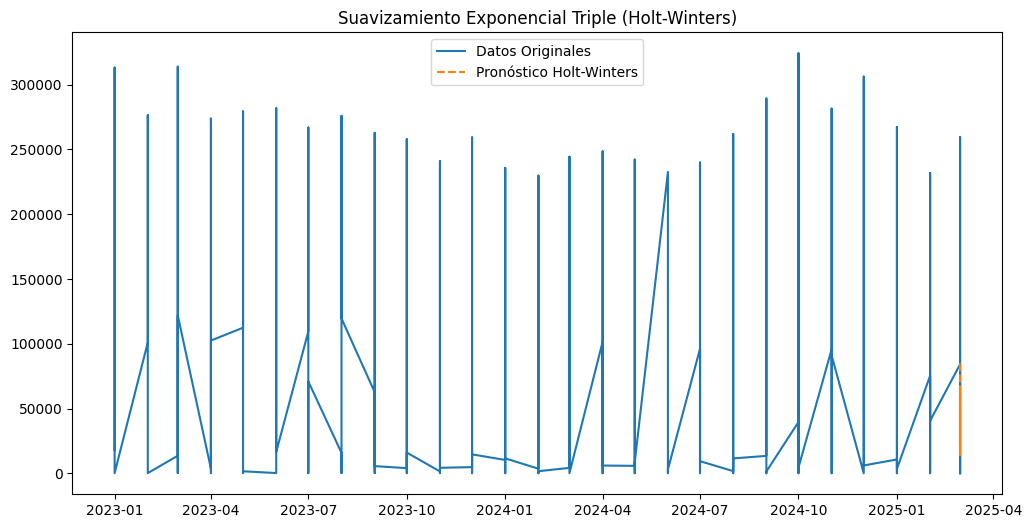

In [ ]:
# Aplicar Suavizamiento Exponencial Triple (Holt-Winters)
seasonal_periods = 12  # Ajustar según los datos (ejemplo: 12 si es mensual)
model_hw = ExponentialSmoothing(series, trend="add", seasonal="add", seasonal_periods=seasonal_periods)
fit_hw = model_hw.fit()

# Generar pronósticos
forecast_hw = fit_hw.forecast(10)
print("Pronóstico Holt-Winters:", forecast_hw)
# Graficar resultados
plt.figure(figsize=(12,6))
plt.plot(df_h["date"], series, label="Datos Originales")
plt.plot(df_h["date"].iloc[-10:], forecast_hw, label="Pronóstico Holt-Winters", linestyle="dashed")
plt.legend()
plt.title("Suavizamiento Exponencial Triple (Holt-Winters)")
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Pronóstico SARIMA: 322     27557.950865
323     23056.192594
324     44121.653112
325     59019.851988
326     68636.559313
327     60159.889577
328     19268.597602
329     33688.261462
330     22372.096304
331    100558.249092
Name: predicted_mean, dtype: float64


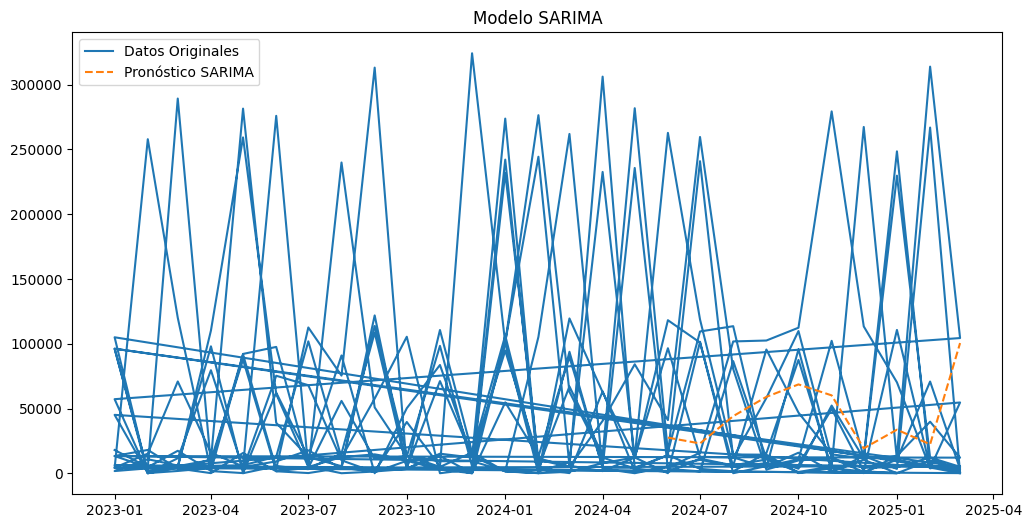

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Aplicar SARIMA con estacionalidad
model_sarima = SARIMAX(series, order=(1,1,1), seasonal_order=(1,1,1,12))
fit_sarima = model_sarima.fit()

# Generar pronósticos
forecast_sarima = fit_sarima.forecast(10)
print("Pronóstico SARIMA:", forecast_sarima)
# Graficar resultados
plt.figure(figsize=(12,6))
plt.plot(df["date"], series, label="Datos Originales")
plt.plot(df["date"].iloc[-10:], forecast_sarima, label="Pronóstico SARIMA", linestyle="dashed")
plt.legend()
plt.title("Modelo SARIMA")
plt.show()